# K-means clustering

## import library

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as colors
from matplotlib import cm

## load data

In [2]:
fname_data = 'assignment_11_data.csv'

feature = np.genfromtxt(fname_data, delimiter=',')

x = feature[:,0]
y = feature[:,1]

number_data     = np.size(feature, 0)
number_feature  = np.size(feature, 1)

print('number of data : {}'.format(number_data))
print('number of feature : {}'.format(number_feature))

number of data : 1000
number of feature : 2


## plot the input data

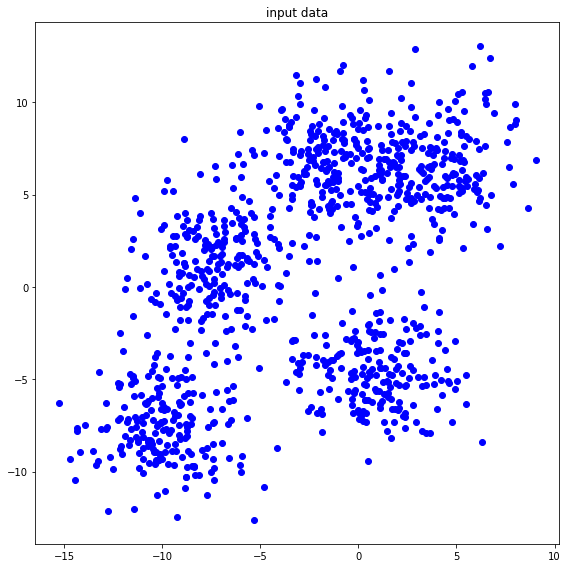

In [3]:

plt.figure(figsize=(8,8))
plt.title('input data')

plt.plot(x, y,'o', color='blue')


plt.tight_layout()
plt.show()

## compute distance
### feature : $n \times m$, center : $1 \times m$, distance : $n \times 1$
### $n$ : number of data, $m$ : number of features

In [40]:
def compute_distance(feature, center):
    distance = []
    for i in range(len(feature)):
        distance_x = (feature[i][0] - center[0]) ** 2
        distance_y = (feature[i][1] - center[1]) ** 2
        distance.append(np.sqrt(distance_x + distance_y))
    distance = np.array(distance)
    return distance

## compute centroid
### feature : $n \times m$, label_feature : $n \times 1$, value_label : $1 \times 1$, centroid : $1 \times m$
### $n$ : number of data, $m$ : number of features

In [5]:
label_feature = np.zeros(number_data)         #cluster label intialize

for i in range(len(label_feature)):
    label_feature[i] = np.random.randint(0,5) # cluster 0 ~ 4

In [122]:
num_check = 0
index_storage = []
for i in range(number_data):
    if label_feature[i] == 3:
        num_check += 1
        index_storage.append(i)

cluster_feature = np.zeros(shape=(num_check, number_feature))
for i in range(num_check):
    cluster_feature[i][0] = feature[index_storage[i]][0]
    cluster_feature[i][1] = feature[index_storage[i]][1]
    
if num_check == 0:
        centroids[0] = 999999
        centroids[1] = 999999
else:
    centroids = np.mean(cluster_feature, axis = 0)

sum(compute_distance(cluster_feature, centroid[3]))*(1/num_check)

6.466119013198147

In [123]:
def compute_centroid(feature, label_feature, value_label):
    num_check = 0
    index_storage = []
    centroids = np.zeros((2,))
    for i in range(number_data):
        if label_feature[i] == value_label:
            num_check += 1
            index_storage.append(i)
            
    cluster_feature = np.zeros(shape=(num_check, number_feature))
    for i in range(num_check):
        cluster_feature[i][0] = feature[index_storage[i]][0]
        cluster_feature[i][1] = feature[index_storage[i]][1]
        
    if num_check == 0:
        centroids[0] = 999999
        centroids[1] = 999999
        loss = 0
    else:
        centroids = np.mean(cluster_feature, axis = 0)
        loss = sum(compute_distance(cluster_feature, centroid[value_label]))*(1/num_check)
        
    return centroids, loss

## compute label
### distance : $n \times k$, label_feature : $n \times 1$
### $n$ : number of data, $k$ : number of clusters

In [130]:
def compute_label(distance):
    index_label_feature = np.zeros(number_data)

    for i in range(number_data):
        cluster = np.argmin(distance[i])
        index_label_feature[i] = cluster
    
    return index_label_feature


In [169]:
label_feature = np.zeros(number_data)         #cluster label intialize

for i in range(len(label_feature)):
    label_feature[i] = np.random.randint(0,5) # cluster 0 ~ 4

In [170]:
# ===================================================
# assign the number of clusters and iterations
number_cluster      = 5
number_iteration    = 10
# ===================================================

In [171]:
label_feature = np.zeros(number_data)         #cluster label intialize

for i in range(len(label_feature)):
    label_feature[i] = np.random.randint(0,number_cluster) # cluster 0 ~ 4

In [172]:
distance            = np.zeros(shape=(number_data, number_cluster))
centroid            = np.zeros(shape=(number_cluster, number_feature))
loss_iteration      = np.zeros(shape=(number_iteration, 1))
centroid_iteration  = np.zeros(shape=(number_iteration, number_cluster, number_feature))
loss_iteration      = np.zeros(number_iteration)
final_point = np.zeros(shape = (number_cluster, number_feature))
initial_point = np.zeros(shape=(number_cluster, number_feature))

for i in range(number_iteration):
    distance = distance.T
    temp = 0
    for k in range(5):
        a, loss = compute_centroid(feature, label_feature, k)
        temp += loss
        if a[0] > 99999:
            continue
        centroid[k] = a
        
    loss_iteration[i]   = loss    
        
    for j in range(5):
        distance[j] = compute_distance(feature, centroid[j])
        
      
    final_point = centroid
    distance = distance.T
    label_feature = compute_label(distance)
    centroid_iteration[i] = centroid
    

7.894847778857023
7.561053472712932
5.135982078739004
4.34065631739276
3.3362411718452276
3.005927972887823
2.9399271396400968
2.7888477468229067
2.6885178625171995
2.685617708754302


### n = 10 case

## plot the results

In [135]:
def plot_data(feature):
    
    plt.figure(figsize=(8,8))   
    plt.title('input data')

    plt.plot(x, y,'o', color='blue')

    plt.tight_layout()
    plt.show()

In [136]:
def plot_loss_curve(loss_iteration):

    plt.figure(figsize=(8,6))   # USE THIS VALUE for the size of the figure
    plt.title('loss')
    plt.plot(loss_iteration, '-', color='red')
    plt.tight_layout()
    plt.show()

In [153]:
initial_point[:,0]

array([-1.5358288 ,  4.05662534, -9.86675897,  0.86873053, -7.41863797])

In [154]:
initial_point

array([[-1.5358288 ,  6.76943913],
       [ 4.05662534,  6.59151053],
       [-9.86675897, -7.52143374],
       [ 0.86873053, -4.5026988 ],
       [-7.41863797,  1.33235634]])

In [189]:
centroid_iteration

array([[[-3.05808922,  0.40866426],
        [-3.00916231,  0.24937543],
        [-3.14474835,  0.41984198],
        [-2.66343868,  0.89815199],
        [-2.32648203,  0.61404896]],

       [[-3.05808922,  0.40866426],
        [-7.10760131, -7.04579748],
        [-8.34678616,  0.22948525],
        [-1.13877033,  6.99874433],
        [ 3.17864728,  1.25380994]],

       [[-2.18359737, -1.71892277],
        [-8.70966789, -7.49130589],
        [-8.1246643 ,  1.15702903],
        [ 0.13136839,  7.27409107],
        [ 3.48368799,  0.07839105]],

       [[-0.68653894, -4.18005605],
        [-9.89352999, -7.60637444],
        [-7.6691868 ,  1.52110573],
        [ 0.87250415,  7.06608595],
        [ 3.69590156, -0.83561724]],

       [[ 0.14730388, -4.92152502],
        [-9.91934548, -7.53109321],
        [-7.27625712,  1.57088876],
        [ 1.20356071,  6.9059195 ],
        [ 3.55054989, -1.33560064]],

       [[ 0.28914663, -5.00387175],
        [-9.91274244, -7.50878068],
        [-7.199854

In [199]:

def plot_centroid(centroid_iteration, number_cluster):



    plt.figure(figsize=(8,8))   # USE THIS VALUE for the size of the figure
    plt.title('centroid')
    
    plt.plot(centroid_iteration[:, 0][:,0], centroid_iteration[:, 0][:,1], '-', color='purple', label= 'cluster = 0')
    plt.plot(centroid_iteration[:, 1][:,0], centroid_iteration[:, 1][:,1], '-', color='green', label= 'cluster = 1')
    plt.plot(centroid_iteration[:, 2][:,0], centroid_iteration[:, 2][:,1], '-', color='blue', label= 'cluster = 2')
    plt.plot(centroid_iteration[:, 3][:,0], centroid_iteration[:, 3][:,1],  '-', color='yellow', label= 'cluster = 3')
    plt.plot(centroid_iteration[:, 4][:,0], centroid_iteration[:, 4][:,1],  '-', color='orange', label= 'cluster = 4')
    plt.plot(centroid_iteration[0][:,0], centroid_iteration[0][:,1],'o', color='blue', label= 'initial')
    plt.plot(centroid_iteration[-1][:,0], centroid_iteration[-1][:,1],'s', color='red', label= 'final')
    

    
    plt.legend(loc="upper right")
    plt.tight_layout()
    plt.show()

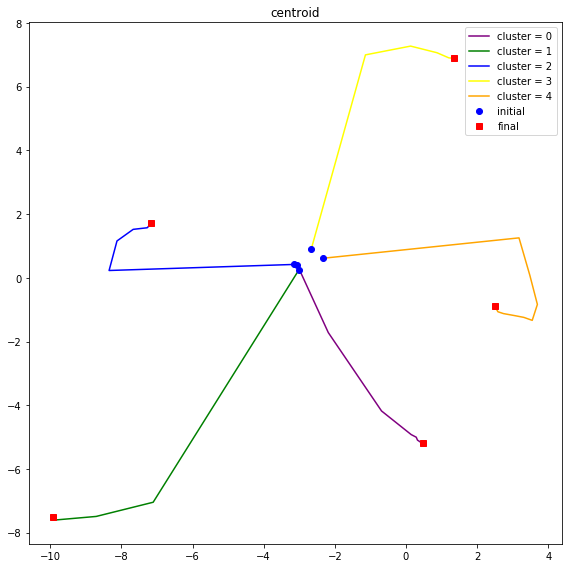

In [200]:
plot_centroid(centroid_iteration, 5)

In [139]:
def plot_cluster(feature, label_feature):
    color_num = 5
    plt.figure(figsize=(8,8))   # USE THIS VALUE for the size of the figure
    plt.title('cluster')
    plt.scatter(x,y, c = label_feature, cmap = plt.cm.get_cmap('rainbow', color_num), alpha = 0.5)
    plt.colorbar(ticks = range(color_num), format = '%d', label = 'cluster')
    
    plt.tight_layout()
    plt.show()


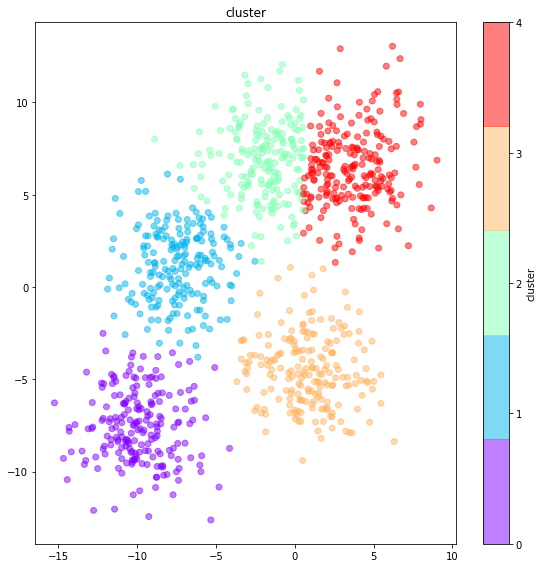

In [140]:
plot_cluster(feature, label_feature)

***

# results

***

1. plot the input data

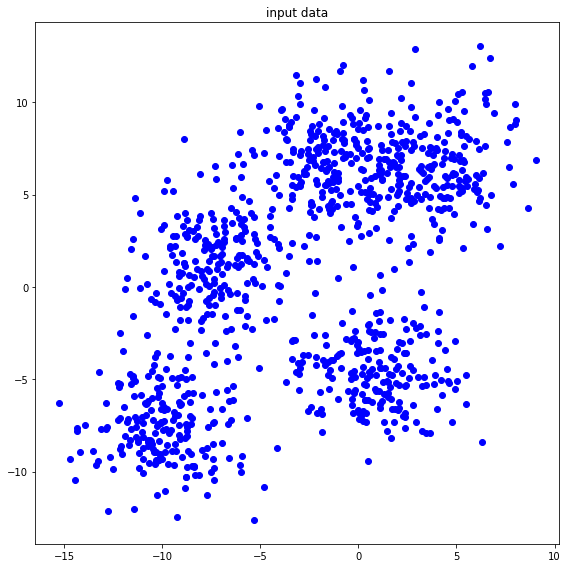

In [24]:
plot_data(feature)

***

2. plot the loss over the iterations with the number of clusters being 5

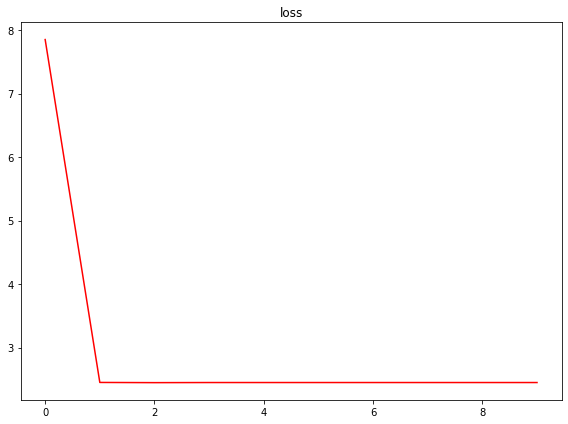

In [95]:
plot_loss_curve(loss_iteration)

***

3. plot the trajectory of the centroid for each cluster (blue circle for the initial and red square for the final) with the number of clusters being 5

In [26]:
plot_centroid(centroid_iteration)

NameError: name 'plot_centroid' is not defined

***

4. plot the final clustering result with the number of clusters being 5

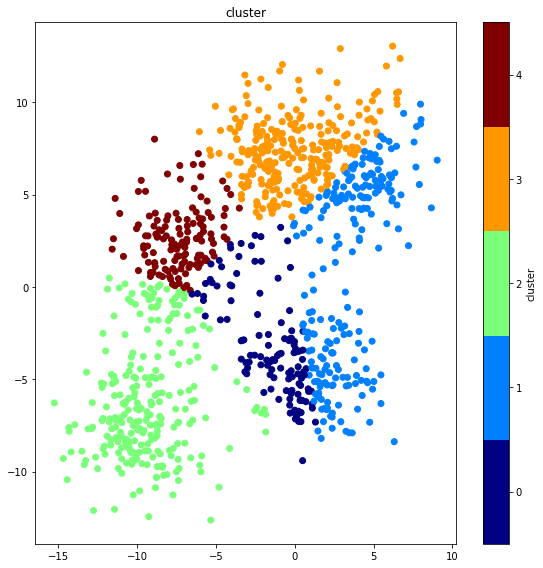

In [90]:
plot_cluster(feature, label_feature, label_cluster)

***

5. plot the loss over the iterations with the number of clusters being 10

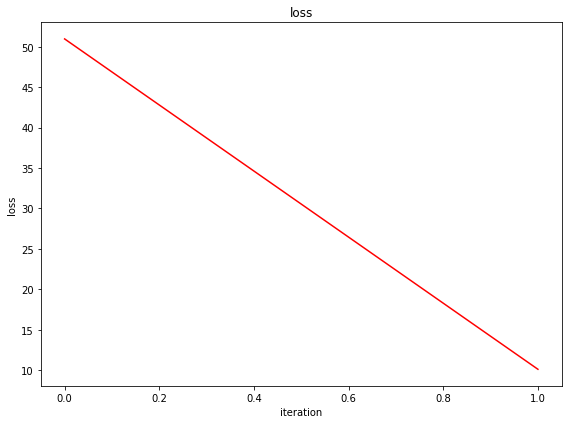

In [97]:
plot_loss_curve(loss_iteration)

***

6. plot the trajectory of the centroid for each cluster (blue circle for the initial and red square for the final) with the number of clusters being 10

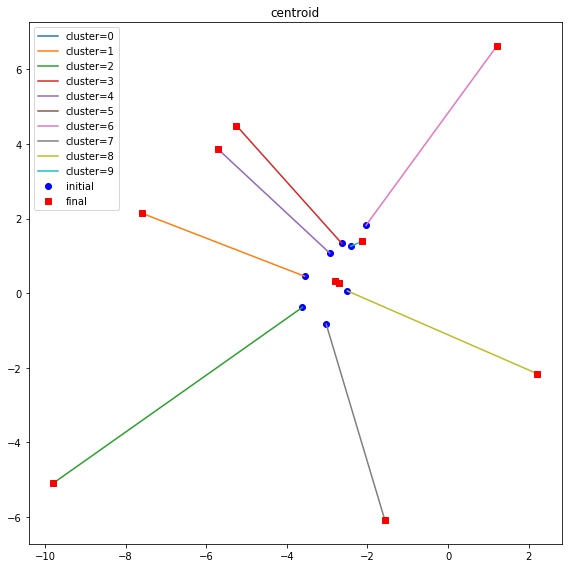

In [98]:
plot_centroid(centroid_iteration)

***

7. plot the final clustering result with the number of clusters being 10

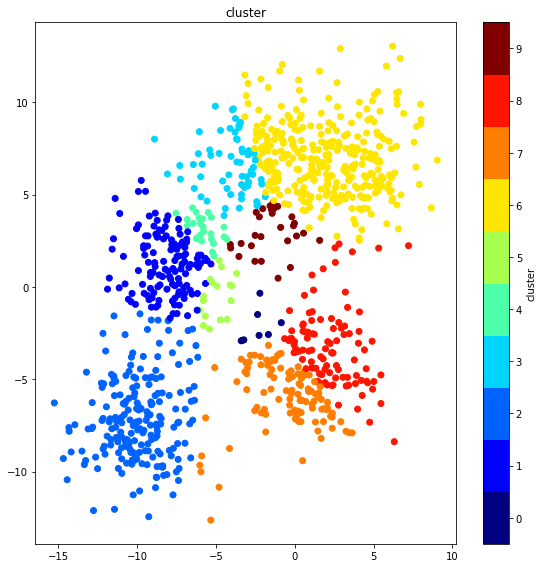

In [99]:
plot_cluster(feature, label_feature, label_cluster)

***